In [243]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score

In [193]:
df = pd.read_csv('D2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6110 entries, 0 to 6109
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6110 non-null   object 
 1   age               6110 non-null   object 
 2   height            6110 non-null   int64  
 3   weight            6110 non-null   int64  
 4   blood_type        6110 non-null   object 
 5   insurance         6110 non-null   object 
 6   income            6110 non-null   object 
 7   race              6110 non-null   object 
 8   immigrant         6110 non-null   object 
 9   smoking           6110 non-null   object 
 10  alcohol           6110 non-null   float64
 11  contacts_count    6110 non-null   float64
 12  house_count       6110 non-null   float64
 13  working           6110 non-null   object 
 14  worried           6110 non-null   int64  
 15  covid19_positive  6110 non-null   int64  
dtypes: float64(3), int64(4), object(9)
memory 

In [194]:
for col in df:
    print(col)
    print(df[col].unique())
    print("")

gender
['male' 'female' 'other']

age
['30_40' '70_80' '50_60' '20_30' '60_70' '40_50' '80_90' '90_100' '10_20'
 '0_10' '100_110']

height
[174 182 184 164 192 180 186 176 172 178 190 158 132 170 152 162 166 168
 154 160 156 150 194 188 198 196 136 146 144 138 148 114 116 238 134 126
 204 228 122 200 118 110 120 128 210 124 112 202 130 216]

weight
[ 64 118  72  92 100  80  84 116  82  68  78 180  96 136  62 114  58  76
 160 104  70 124 106  52  56  66  90  54 102  88  60  86 122 112  50 146
  74 138 128 132  48  98 126 134  94 130  44 164 110 158  46 150 140 148
 152 166 108 144 120 162 168 176 178 174 142 154 156 170]

blood_type
['bp' 'unknown' 'an' 'ap' 'on' 'op' 'abp' 'abn' 'bn']

insurance
['yes' 'no']

income
['med' 'low' 'high' 'gov']

race
['white' 'mixed' 'asian' 'black' 'hispanic' 'other']

immigrant
['native' 'immigrant']

smoking
['never' 'quit0' 'quit5' 'yeslight' 'quit10' 'yesheavy' 'yesmedium' 'vape']

alcohol
[ 3.0132005  0.        14.         5.         2.        11.


In [300]:
def data_prep():
    
    df = pd.read_csv('D2.csv')
    
    df['alcohol'] = df['alcohol'].round().astype(int)
    df['contacts_count'] = df['contacts_count'].round().astype(int)
    df['house_count'] = df['house_count'].round().astype(int) 
    
    age_map = {'30_40':4 ,'70_80':8, '50_60':6, '20_30':3, '60_70':7, '40_50':5, 
               '80_90':9,'90_100':10, '10_20':2,'0_10':1, '100_110':11}
    df['age'] = df['age'].map(age_map)    
    
    insurance_map = {'yes':1, 'no':0}
    df['insurance'] = df['insurance'].map(insurance_map)
    
    immigrant_map = {'native':0, 'immigrant':1}
    df['immigrant'] = df['immigrant'].map(immigrant_map)
    
    df.drop(['blood_type'], axis=1, inplace=True)
    
    df = pd.get_dummies(df)
    
    return df
    
    
df = data_prep()

# target/input split
y = df['covid19_positive']
X = df.drop(['covid19_positive'], axis=1)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6110 entries, 0 to 6109
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          6110 non-null   int64
 1   height                       6110 non-null   int64
 2   weight                       6110 non-null   int64
 3   insurance                    6110 non-null   int64
 4   immigrant                    6110 non-null   int64
 5   alcohol                      6110 non-null   int64
 6   contacts_count               6110 non-null   int64
 7   house_count                  6110 non-null   int64
 8   worried                      6110 non-null   int64
 9   covid19_positive             6110 non-null   int64
 10  gender_female                6110 non-null   uint8
 11  gender_male                  6110 non-null   uint8
 12  gender_other                 6110 non-null   uint8
 13  income_gov                   6110 non-null   uin

In [301]:
X_mat = X.to_numpy()

In [302]:
 # setting random state
rs = 10

X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=0)    


# Putting the pre-processing all together

In [303]:
def data_prep():
    
    df = pd.read_csv('D2.csv')
    
    df['alcohol'] = df['alcohol'].round().astype(int)
    df['contacts_count'] = df['contacts_count'].round().astype(int)
    df['house_count'] = df['house_count'].round().astype(int) 
    
    age_map = {'30_40':4 ,'70_80':8, '50_60':6, '20_30':3, '60_70':7, '40_50':5, 
               '80_90':9, '90_100':10, '10_20':2,
                '0_10':1, '100_110':11}
    df['age'] = df['age'].map(age_map)
    
    insurance_map = {'yes':1, 'no':0}
    df['insurance'] = df['insurance'].map(insurance_map)
    
    immigrant_map = {'native':0, 'immigrant':1}
    df['immigrant'] = df['immigrant'].map(immigrant_map)
    
    df.drop(['blood_type'], axis=1, inplace=True)
    
    df = pd.get_dummies(df)

    # target/input split
    y = df['covid19_positive']
    X = df.drop(['covid19_positive'], axis=1)
    
    # setting random state
    rs = 10
    
    X_mat = X.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, 
                                                        stratify=y, random_state=0)    
    
    return df,X,y,X_train, X_test, y_train, y_test


# Building your first decision tree

In [304]:
df,X,y,X_train, X_test, y_train, y_test = data_prep()

rs = 10
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

# print model parameters
print(model.get_params(deep = True))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 10, 'splitter': 'best'}


In [305]:
print("Train accuracy:", model.score(X_train, y_train))

Train accuracy: 0.999766191255553


In [299]:
print("Test accuracy:", model.score(X_test, y_test))

Test accuracy: 0.6546644844517185


In [264]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1070
           1       0.59      0.58      0.58       763

    accuracy                           0.65      1833
   macro avg       0.64      0.64      0.64      1833
weighted avg       0.65      0.65      0.65      1833



In [306]:
# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis = 0)

# limit to 20 features
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

weight : 0.13097801855929342
height : 0.11423681117042407
contacts_count : 0.10820869009663625
age : 0.09309356782452607
income_high : 0.0919245231909026
alcohol : 0.07671148505813816
house_count : 0.06800171712692704
worried : 0.06211533224267972
insurance : 0.020127577176593938
smoking_never : 0.018893571606378234
income_med : 0.01787649256228655
working_stopped : 0.01670726391971486
race_white : 0.013986305622343985
working_never : 0.013228465551065738
immigrant : 0.012997595090365513
gender_female : 0.012507290794615395
smoking_quit0 : 0.011364628036935508
smoking_quit10 : 0.011145164532837743
smoking_quit5 : 0.010772576461752746
working_travel non critical : 0.010759350297957698


# Visualising decision tree structure

In [266]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph.write_png("dt_viz.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.746962 to fit



True

In [311]:
# Training accuracy
train_accuracy = model.score(X_train, y_train)
print("Train Accuracy: ", train_accuracy)

# Test accuracy
test_accuracy = model.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  0.999766191255553
Test Accuracy:  0.6546644844517185


In [268]:
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

# Get the number of nodes
n_nodes = model.tree_.node_count

# Get the number of rules
n_rules = model.tree_.n_leaves

#Get the depth of the tree
n_depth = model.tree_.max_depth

print("Number of nodes:", n_nodes)
print("Number of rules:", n_rules)
print("Tree depth:", n_depth)

Number of nodes: 2139
Number of rules: 1070
Tree depth: 29


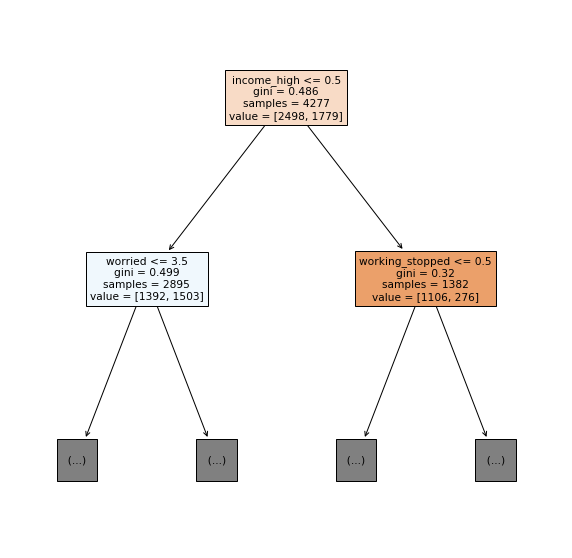

In [269]:
# First Rule
fig = plt.figure(figsize = (10, 10))
a = tree.plot_tree(model, feature_names = X.columns, 
                   max_depth = 1, filled = True)

In [270]:
# Get the index of the variable used for the first split
root_split_feature_index = model.tree_.feature[0]

root_split_feature_name = X.columns[root_split_feature_index]

print(root_split_feature_name)

income_high


In [308]:
print(tree.export_text(model, feature_names = list(X)))

|--- income_high <= 0.50
|   |--- worried <= 3.50
|   |   |--- age <= 8.50
|   |   |   |--- weight <= 97.00
|   |   |   |   |--- weight <= 61.00
|   |   |   |   |   |--- smoking_vape <= 0.50
|   |   |   |   |   |   |--- height <= 159.00
|   |   |   |   |   |   |   |--- house_count <= 4.50
|   |   |   |   |   |   |   |   |--- weight <= 45.00
|   |   |   |   |   |   |   |   |   |--- smoking_never <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- smoking_never >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- weight >  45.00
|   |   |   |   |   |   |   |   |   |--- age <= 4.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- age >  4.50
|   |   |   |   |   |   |   |   |   |   |--- house_count <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- house_count >  1.50
|   |   |   |   |   | 

In [271]:
# Top five
importances = model.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

for i in indices[:5]:
    print(feature_names[i], ':', importances[i])

weight : 0.13097801855929342
height : 0.11423681117042407
contacts_count : 0.10820869009663625
age : 0.09309356782452607
income_high : 0.0919245231909026


In [272]:
# Get model parameters
params = model.get_params()

# Print the parameters
for param in params:
    print(f"{param}: {params[param]}")

ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
random_state: 10
splitter: best


In [273]:
# retrain with a small max_depth limit

model_small = DecisionTreeClassifier(max_depth=3, random_state=rs)
model_small.fit(X_train, y_train)

print("Train accuracy:", model_small.score(X_train, y_train))
print("Test accuracy:", model_small.score(X_test, y_test))

y_pred = model_small.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.6911386485854571
Test accuracy: 0.6988543371522095
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1070
           1       0.64      0.64      0.64       763

    accuracy                           0.70      1833
   macro avg       0.69      0.69      0.69      1833
weighted avg       0.70      0.70      0.70      1833



In [274]:
importances = model_small.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

income_high : 0.5962350919864666
worried : 0.28523730738803815
age : 0.07996456948920593
working_stopped : 0.028632699330907577
weight : 0.009930331805381559
income_low : 0.0
income_gov : 0.0
gender_other : 0.0
gender_male : 0.0
gender_female : 0.0
house_count : 0.0
race_asian : 0.0
contacts_count : 0.0
alcohol : 0.0
immigrant : 0.0
insurance : 0.0
height : 0.0
income_med : 0.0
working_travel non critical : 0.0
working_travel critical : 0.0


# Finding optimal hyperparameters with GridSearchCV

In [275]:
from sklearn.model_selection import GridSearchCV

In [276]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), return_train_score=True, cv=10)
cv_1.fit(X_train, y_train)
                    
result_set = cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([0.00291145, 0.00239623, 0.00240705, 0.00249395, 0.00368841,
       0.00355589, 0.00350161, 0.00352793, 0.00478265, 0.0047318 ,
       0.00479133, 0.00477757, 0.00598218, 0.00589435, 0.00590675,
       0.00583456, 0.00698206, 0.00700145, 0.00708103, 0.00699043,
       0.00825465, 0.00811787, 0.00812097, 0.00802398, 0.00922937,
       0.00918858, 0.00906303, 0.00906367, 0.01044488, 0.01013563,
       0.01007206, 0.00975566, 0.01145895, 0.01207848, 0.01069834,
       0.01024785, 0.01253295, 0.0117455 , 0.01118441, 0.01078632,
       0.01320977, 0.01246014, 0.01177692, 0.01129336, 0.0139158 ,
       0.01307099, 0.01211429, 0.01174512, 0.01490712, 0.01340871,
       0.01253147, 0.01198118, 0.01529024, 0.0137691 , 0.01283057,
       0.01217744, 0.01568234, 0.01396496, 0.01294878, 0.01229019,
       0.00235355, 0.00226779, 0.00223947, 0.00223789, 0.00346708,
       0.00346742, 0.0034338 , 0.00343525, 0.00476499, 0.00466797,
       0.00465038, 0.00471683, 0.00588098, 0

In [334]:
import matplotlib.pyplot as plt

train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))

Total number of models:  120


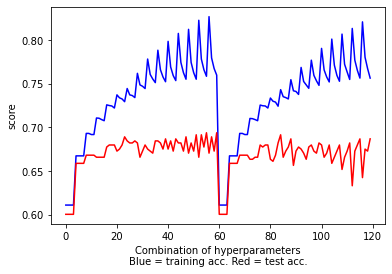

In [335]:
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

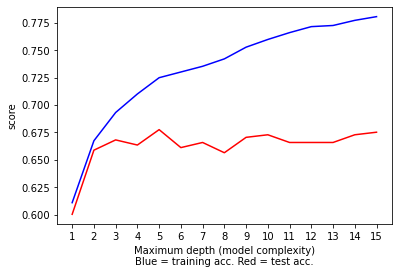

In [336]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

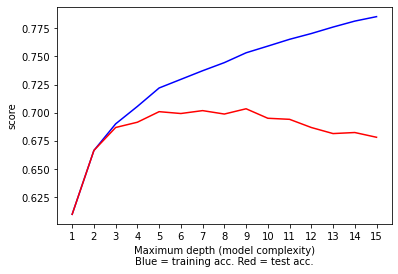

In [337]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']

max_depth_train = []
max_depth_test = []
index_
for i in range(len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.ylabel('score')
plt.show()

In [333]:
print(cv_1.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5}


In [282]:
cv_1.fit(X_train, y_train)

print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

Train accuracy: 0.7428103811082535
Test accuracy: 0.7059465357337698


In [317]:
def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
    # grab feature importances from the model
    importances = dm_model.feature_importances_
    
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)

    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:n_to_display]

    # print(indices)
    
    for i in indices:
        print(feature_names[i], ':', importances[i])

def visualize_decision_tree(dm_model, feature_names, save_name):
    dotfile = StringIO()
    export_graphviz(dm_model, out_file=dotfile, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dotfile.getvalue())
    graph.write_png("optimal_tree.png") # saved in the following file

analyse_feature_importance(cv_1.best_estimator_, X.columns, 20)
visualize_decision_tree(cv_1.best_estimator_, X.columns, "optimal_tree.png")

income_high : 0.3190086808955489
worried : 0.14489318843032256
weight : 0.07403931293755875
age : 0.07141532375467496
contacts_count : 0.0701721943066074
height : 0.06365856898085374
income_med : 0.05285158373270131
insurance : 0.04962797337956081
race_white : 0.03916274478461132
working_stopped : 0.026257804281694396
alcohol : 0.013346374482412344
house_count : 0.01250734715415805
working_home : 0.010649728585312861
gender_male : 0.0067795748746737345
working_never : 0.0060478784415858005
race_other : 0.0054792149227313475
smoking_vape : 0.005292993252627642
race_mixed : 0.005002189747321963
working_travel critical : 0.00488793321438116
immigrant : 0.004866216157885805


In [284]:
n_nodes = cv_1.best_estimator_.tree_.node_count

n_rules = cv_1.best_estimator_.tree_.n_leaves

n_depth = cv_1.best_estimator_.tree_.max_depth

print("Number of nodes:",n_nodes)
print("Number of rules:", n_rules)
print("Tree depth:", n_depth)

Number of nodes: 153
Number of rules: 77
Tree depth: 7


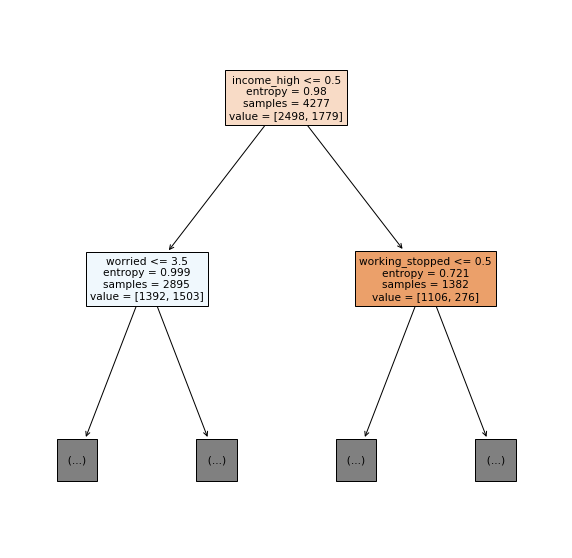

In [285]:
# First Rule
fig = plt.figure(figsize = (10, 10))
a = tree.plot_tree(cv_1.best_estimator_, feature_names = X.columns, 
                   max_depth = 1, filled = True)

In [313]:
# Get the index of the variable used for the first split
root_split_feature_index = cv_1.best_estimator_.tree_.feature[0]

root_split_feature_name = X.columns[root_split_feature_index]

print(root_split_feature_name)


income_high


In [312]:
print(tree.export_text(cv_1.best_estimator_, feature_names = list(X)))

|--- income_high <= 0.50
|   |--- worried <= 3.50
|   |   |--- age <= 8.50
|   |   |   |--- weight <= 97.00
|   |   |   |   |--- weight <= 61.00
|   |   |   |   |   |--- height <= 159.00
|   |   |   |   |   |   |--- contacts_count <= 11.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- contacts_count >  11.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- height >  159.00
|   |   |   |   |   |   |--- working_stopped <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- working_stopped >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- weight >  61.00
|   |   |   |   |   |--- height <= 163.00
|   |   |   |   |   |   |--- smoking_quit5 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- smoking_quit5 >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- height >  163.00
|   |   |   |   |   |   |--- contacts_count <= 0.50
|   |   |   |   |   |   |   |---

In [286]:
# Top five
importances = cv_1.best_estimator_.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

for i in indices[:5]:
    print(feature_names[i], ':', importances[i])

income_high : 0.3190086808955489
worried : 0.14489318843032256
weight : 0.07403931293755875
age : 0.07141532375467496
contacts_count : 0.0701721943066074


# Comparision and finding the best performing model using ROC curve

In [287]:
dt_cv_best = cv_1.best_estimator_
# probability prediction from decision tree
y_pred_proba_dt = dt_cv_best.predict_proba(X_test)

print("Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.
(Probs on zero)	(probs on one)	(prediction made)
1.0 	 0.0 	 0
0.773972602739726 	 0.22602739726027396 	 0
0.12690355329949238 	 0.8730964467005076 	 1
0.8860759493670886 	 0.11392405063291139 	 0
0.7314814814814815 	 0.26851851851851855 	 0
1.0 	 0.0 	 0
0.6785714285714286 	 0.32142857142857145 	 1
0.7314814814814815 	 0.26851851851851855 	 0
0.8148148148148148 	 0.18518518518518517 	 0
0.3386023294509151 	 0.6613976705490848 	 1
0.3386023294509151 	 0.6613976705490848 	 1
0.773972602739726 	 0.22602739726027396 	 0
0.3386023294509151 	 0.6613976705490848 	 1
0.8860759493670886 	 0.11392405063291139 	 0
0.7314814814814815 	 0.26851851851851855 	 0
0.12690355329949238 	 0.8730964467005076 	 1
0.3386023294509151 	 0.6613976705490848 	 1
0.7314814814814815 	 0.26851851851851855 	 0
0.7314814814814815 	 0.26851851851851855

In [288]:
from sklearn.metrics import roc_auc_score

y_pred_proba_dt = model.predict_proba(X_test)
#y_pred_proba_dt_small = model_small.predict_proba(X_test)
y_pred_proba_dt_cv = dt_cv_best.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_small = roc_auc_score(y_test, y_pred_proba_dt_small[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
#print("ROC index on test for DT_small:", roc_index_dt_small)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.6444157959848605
ROC index on test for DT_optimal: 0.7327758111733075


In [289]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
#fpr_dt_small, tpr_dt_small, thresholds_dt_small = roc_curve(y_test, y_pred_proba_dt_small[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

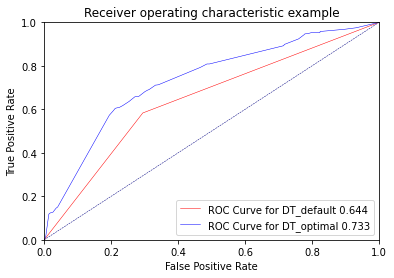

In [325]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
#plt.plot(fpr_dt_small, tpr_dt_small, label='ROC Curve for DT_small {:.3f}'.format(roc_index_dt_small), color='green', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


auc_dt_default = roc_auc_score(y_test, y_pred_proba_dt[:,1])
auc_dt_optimal = roc_auc_score(y_test, y_pred_proba_dt_cv[:,1])

In [319]:
# Differences
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

In [293]:
cv_1.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

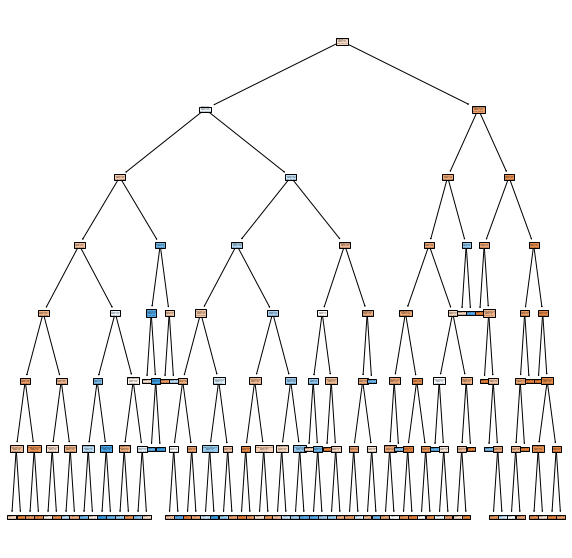

In [294]:
# First Rule
fig = plt.figure(figsize = (10, 10))
b = tree.plot_tree(cv_1.best_estimator_, feature_names = X.columns, filled = True)

In [295]:
print(tree.export_text(cv_1.best_estimator_, feature_names = list(X.columns)))

|--- income_high <= 0.50
|   |--- worried <= 3.50
|   |   |--- age <= 8.50
|   |   |   |--- weight <= 97.00
|   |   |   |   |--- weight <= 61.00
|   |   |   |   |   |--- height <= 159.00
|   |   |   |   |   |   |--- contacts_count <= 11.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- contacts_count >  11.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- height >  159.00
|   |   |   |   |   |   |--- working_stopped <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- working_stopped >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- weight >  61.00
|   |   |   |   |   |--- height <= 163.00
|   |   |   |   |   |   |--- smoking_quit5 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- smoking_quit5 >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- height >  163.00
|   |   |   |   |   |   |--- contacts_count <= 0.50
|   |   |   |   |   |   |   |---

# Saving your output

In [316]:
import pickle
dt_best = cv_1
with open('DT.pickle', 'wb') as f:
    pickle.dump([dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv], f)